# iAssure Service - Summarize Results
Before this notebook can be run, all the results must be preprocessed with ... and the paths must be checked.

In [9]:
data_path <- "data/summary"

size=c()
config_time=c()
model_update=c()
reaction_time=c()
privacy_update=c()
total=c()

# mean = 3
# median = 4
# q1 = 5
# q2 = 6
# var = 7
column <- 3

for (loop in c(1,2,3,4,5,6,7,8,9,
                     10,11,12,13,14,15,16,17,18,19,
                     20,30,40,50,60,70,80,90,95,
                     100,110,120,130,140,150,
                     200,300,400,
                     500,550,560,570,580,590,
                     600,
                     700,710,720,730,740,750,
                     800,
                     900,950,960,970,980,990,
                     1000,1010,1020,1030,1040,1050,
                     2000,3000,4000,5000,6000,7000,8000,9000,
                     10000)) {
    measurementFile <- sprintf("%s/simulated-account-services-%05d.csv", data_path, loop)
    if (file.exists(measurementFile)) {
        if (file.size(measurementFile) > 0) {
            print(sprintf("Reading %s ...", measurementFile))
            input <- read.csv(measurementFile)
            size <- c(size,loop)
            config_time <- c(config_time, input[2,column])
            model_update <- c(model_update, input[3,column])
            reaction_time <- c(reaction_time, input[4,column])
            privacy_update <- c(privacy_update, input[5,column])
            total <- c(total, input[6,column])
        } else {
            print(sprintf("File %s is empty.", measurementFile))
        }
    }    
}

data <- data.frame("index"=size,
    "config_time"=config_time, 
    "model_update"=model_update,
    "reaction_time"=reaction_time,
    "privacy_update"=privacy_update,
    "total"=total,
    stringsAsFactors=FALSE) 

print(data)

[1] "Reading data/summary/simulated-account-services-00001.csv ..."
[1] "Reading data/summary/simulated-account-services-00002.csv ..."
[1] "Reading data/summary/simulated-account-services-00003.csv ..."
[1] "Reading data/summary/simulated-account-services-00004.csv ..."
[1] "Reading data/summary/simulated-account-services-00005.csv ..."
[1] "Reading data/summary/simulated-account-services-00006.csv ..."
[1] "Reading data/summary/simulated-account-services-00007.csv ..."
[1] "Reading data/summary/simulated-account-services-00008.csv ..."
[1] "Reading data/summary/simulated-account-services-00009.csv ..."
[1] "Reading data/summary/simulated-account-services-00010.csv ..."
[1] "Reading data/summary/simulated-account-services-00011.csv ..."
[1] "Reading data/summary/simulated-account-services-00012.csv ..."
[1] "Reading data/summary/simulated-account-services-00013.csv ..."
[1] "Reading data/summary/simulated-account-services-00014.csv ..."
[1] "Reading data/summary/simulated-account-serv

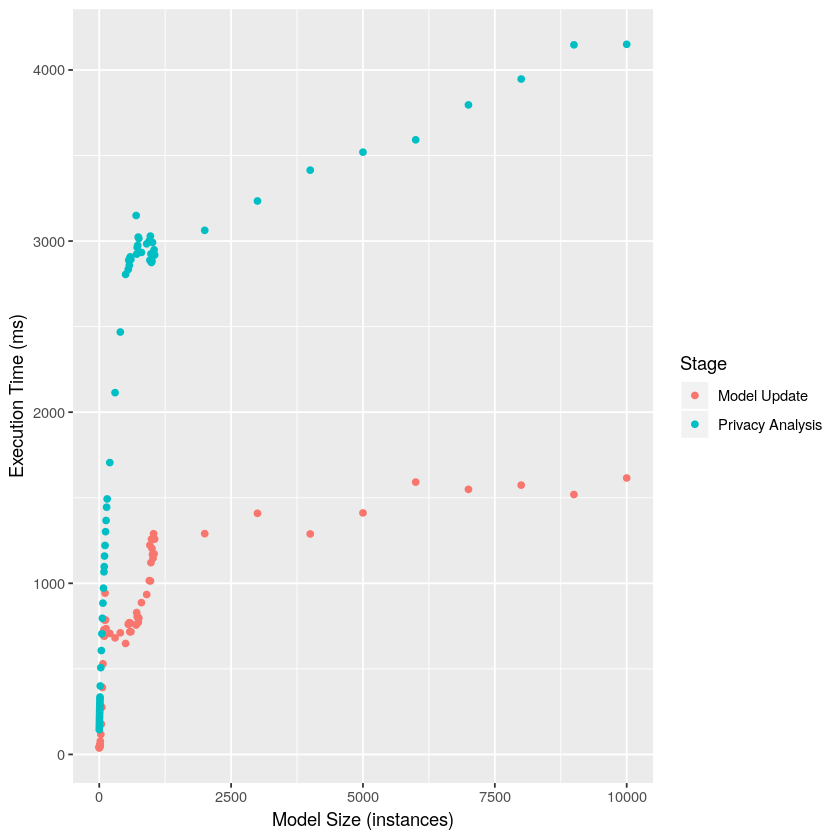

In [8]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)

allColumns <- colnames(data)

measureColumns <- allColumns[c(3,5)]

ggData <- melt(data, id.vars = "index", measure.vars = measureColumns)

ggplot(ggData, aes(x=index, y=value, linetype = variable, color = variable)) + 
    scale_color_discrete(name = "Stage", breaks = c("model_update", "privacy_update"), 
                         labels = c("Model Update", "Privacy Analysis")) +
    geom_point() + 
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ms)")

In [41]:
measureColumns <- allColumns[c(3,5)]

ggData <- melt(data, id.vars = "index", measure.vars = measureColumns)

g <- ggplot(ggData, aes(x=index, y=value, color = variable)) + 
    scale_color_discrete(name = "Stage", breaks = c("model_update", "privacy_update"), 
                         labels = c("Model Update", "Privacy Analysis")) +
    geom_line() +
    geom_point() + 
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ms)") +
    theme(
        axis.title = element_text(size = 8),
        axis.text = element_text(size = 6),
        legend.text = element_text(size = 6),
        legend.title = element_text(size = 8)
    )

ggsave(g, width=123, height=50, filename="model-update-privacy-analysis.pdf", units="mm")

In [42]:
measureColumns <- allColumns[c(2)]

ggData <- melt(data, id.vars = "index", measure.vars = measureColumns)

g <- ggplot(ggData, aes(x=index, y=value, color = variable)) + 
    scale_color_discrete(name = "Stage", 
                         labels = c("Configuration Time")) +
    geom_line() +
    geom_point() + 
    xlab("Model Size (instances)") + 
    ylab("Execution Time (ms)") +
    theme(
        axis.title = element_text(size = 8),
        axis.text = element_text(size = 6),
        legend.text = element_text(size = 6),
        legend.title = element_text(size = 8)
    )

ggsave(g, width=123, height=50, filename="configuration-time.pdf", units="mm")